In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
titleratings = pd.read_csv('titleratings.tsv', sep = '\t')
titleepisode = pd.read_csv('titleepisode.tsv', sep = '\t')
titlebasics = pd.read_csv('titlebasics.tsv', sep = '\t')

C:\Users\Wysteria\AppData\Local\Temp\ipykernel_14128\2425729778.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  titlebasics = pd.read_csv('titlebasics.tsv', sep = '\t')


In [3]:
titleratings.head() 

,tconst,averageRating,numVotes
0,tt0000001,5.7,2014
1,tt0000002,5.7,270
2,tt0000003,6.5,1937
3,tt0000004,5.5,178
4,tt0000005,6.2,2712


In [4]:
titleepisode.head()

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1,9
1,tt0042816,tt0989125,1,17
2,tt0042889,tt0989125,\N,\N
3,tt0043426,tt0040051,3,42
4,tt0043631,tt0989125,2,16


In [5]:
titlebasics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [6]:
rateepisodes = pd.merge(titleratings, titleepisode)
titleep = pd.merge(rateepisodes, titlebasics)

In [7]:
titleep.head()

,tconst,averageRating,numVotes,parentTconst,seasonNumber,episodeNumber,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0041951,7.6,87,tt0041038,1,9,tvEpisode,The Tenderfeet,The Tenderfeet,0,1949,\N,30,Western
1,tt0042816,7.6,12,tt0989125,1,17,tvEpisode,Othello,Othello,0,1950,\N,135,Drama
2,tt0044093,4.5,18,tt0959862,1,6,tvEpisode,The Three Musketeers,The Three Musketeers,0,1950,\N,60,Drama
3,tt0045960,6.9,190,tt0044284,2,3,tvEpisode,King Lear,King Lear,0,1953,\N,75,"Drama,History,Music"
4,tt0046150,8.2,12,tt0341798,\N,\N,tvEpisode,Othello,Othello,0,1953,\N,84,Drama


In [8]:
titleep = titleep.drop(['parentTconst', 'titleType', 'primaryTitle', 'isAdult', 'endYear', 'tconst'], axis = 1)

In [9]:
titleep.replace("\\N", np.nan, inplace = True)
titleep = titleep.dropna()

In [10]:
titleep.head()

,averageRating,numVotes,seasonNumber,episodeNumber,originalTitle,startYear,runtimeMinutes,genres
0,7.6,87,1,9,The Tenderfeet,1949,30,Western
1,7.6,12,1,17,Othello,1950,135,Drama
2,4.5,18,1,6,The Three Musketeers,1950,60,Drama
3,6.9,190,2,3,King Lear,1953,75,"Drama,History,Music"
5,5.9,164,1,4,A Christmas Carol,1954,60,"Adventure,Drama,Family"


In [11]:
epiratings = titleep.drop(['seasonNumber','originalTitle','startYear','runtimeMinutes','genres'], axis = 1)

In [12]:
epirating = epiratings['episodeNumber'] = epiratings['episodeNumber'].astype(int)

In [13]:
epiratings = epiratings[epiratings['episodeNumber'] <= 100]

Text(0, 0.5, 'Average Rating')

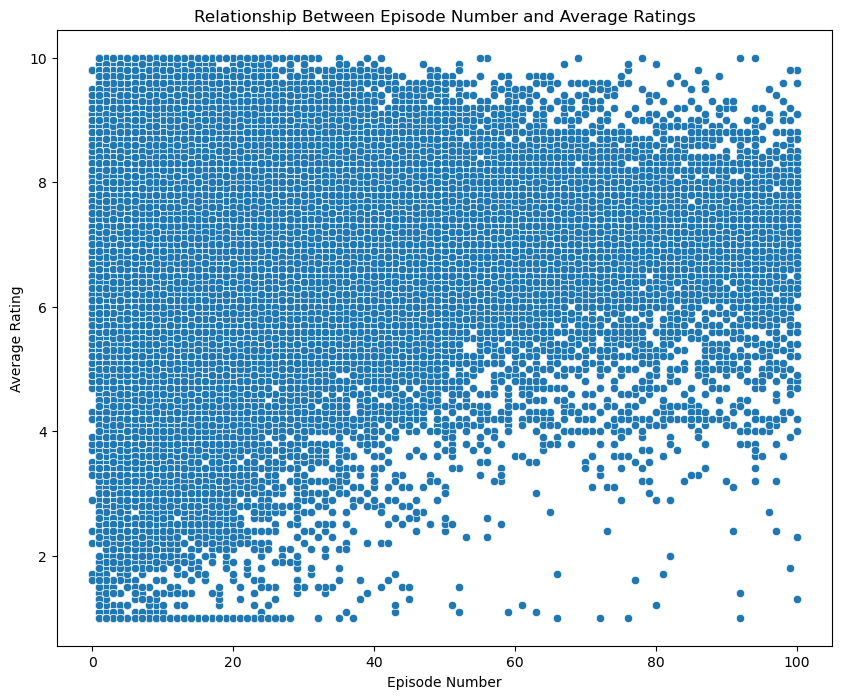

In [67]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = epiratings, x='episodeNumber', y='averageRating')
plt.title('Relationship Between Episode Number and Average Ratings')
plt.xlabel('Episode Number')
plt.ylabel('Average Rating')

<Axes: xlabel='averageRating', ylabel='episodeNumber'>

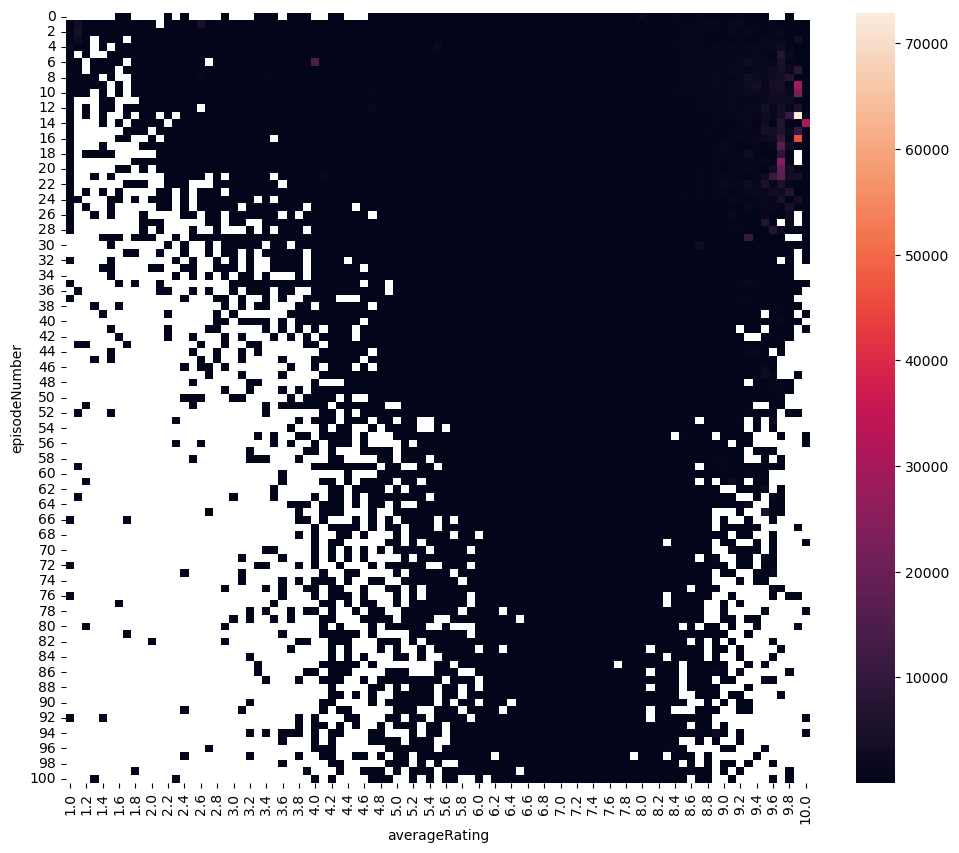

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(data = epiratings.pivot_table(index='episodeNumber', columns='averageRating', values ='numVotes'))

In [16]:
duration = titleep.drop(['seasonNumber', 'episodeNumber','originalTitle','startYear','genres'], axis = 1)

In [17]:
duration.head()

,averageRating,numVotes,runtimeMinutes
0,7.6,87,30
1,7.6,12,135
2,4.5,18,60
3,6.9,190,75
5,5.9,164,60


In [18]:
duration.averageRating.dtype

dtype('float64')

In [19]:
durationtime = duration['runtimeMinutes'] = duration['runtimeMinutes'].astype(int)

(0.0, 200.0)

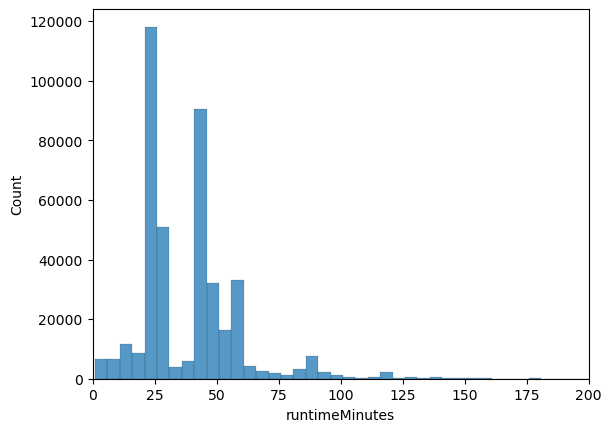

In [68]:
sns.histplot(data=duration, x='runtimeMinutes', binwidth=5)
plt.xlim(0,200)

(0.0, 200.0)

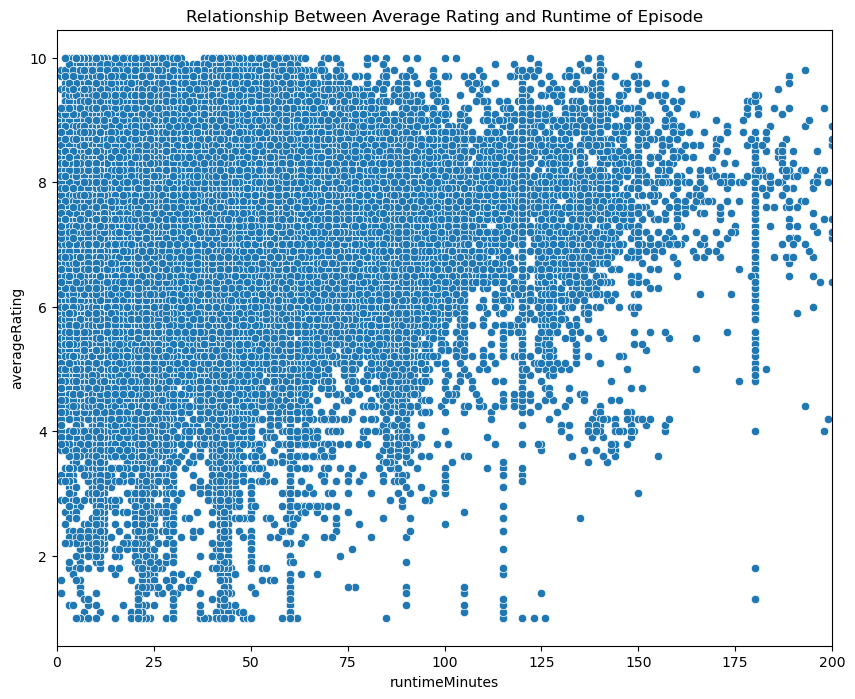

In [65]:
plt.figure(figsize=(10,8))
plt.title('Relationship Between Average Rating and Runtime of Episode')
sns.scatterplot(data = duration, x='runtimeMinutes', y='averageRating')
plt.xlim(0,200)

In [22]:
yearratings = titleep.drop(['numVotes','seasonNumber', 'episodeNumber','originalTitle','runtimeMinutes','genres'], axis = 1)

In [23]:
yearratings.head()

,averageRating,startYear
0,7.6,1949
1,7.6,1950
2,4.5,1950
3,6.9,1953
5,5.9,1954


In [24]:
yearratings.startYear.dtype

dtype('O')

In [25]:
year = yearratings['startYear'] = yearratings['startYear'].astype(int)

In [26]:
yearratings['bin'] = pd.cut(yearratings['startYear'], [1949, 1960, 1970, 1980, 1990, 2000, 2010, 2020, float('inf')], labels = ['1950-1960', '1961-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2011-2020', '2021-Present'])

In [27]:
yearratings = yearratings[yearratings['startYear'] >= 1949]

In [58]:
averages = yearratings.groupby('bin')['averageRating'].mean().head(8)
averages

bin
1950-1960       7.425096
1961-1970       7.414572
1971-1980       7.313742
1981-1990       7.281364
1991-2000       7.299180
2001-2010       7.369994
2011-2020       7.457271
2021-Present    7.421681
Name: averageRating, dtype: float64

In [59]:
averageplot = pd.DataFrame({'Year Range': ['1950-1960', '1961-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2011-2020', '2021-Present'], 'Average Rating': [7.425096, 7.414572, 7.313742, 7.281364, 7.299180, 7.369994, 7.457271, 7.421681]}, index = [1,2,3,4,5,6,7,8])

In [60]:
averageplot.head(8)

,Year Range,Average Rating
1,1950-1960,7.425096
2,1961-1970,7.414572
3,1971-1980,7.313742
4,1981-1990,7.281364
5,1991-2000,7.299180
6,2001-2010,7.369994
7,2011-2020,7.457271
8,2021-Present,7.421681


(0.0, 10.0)

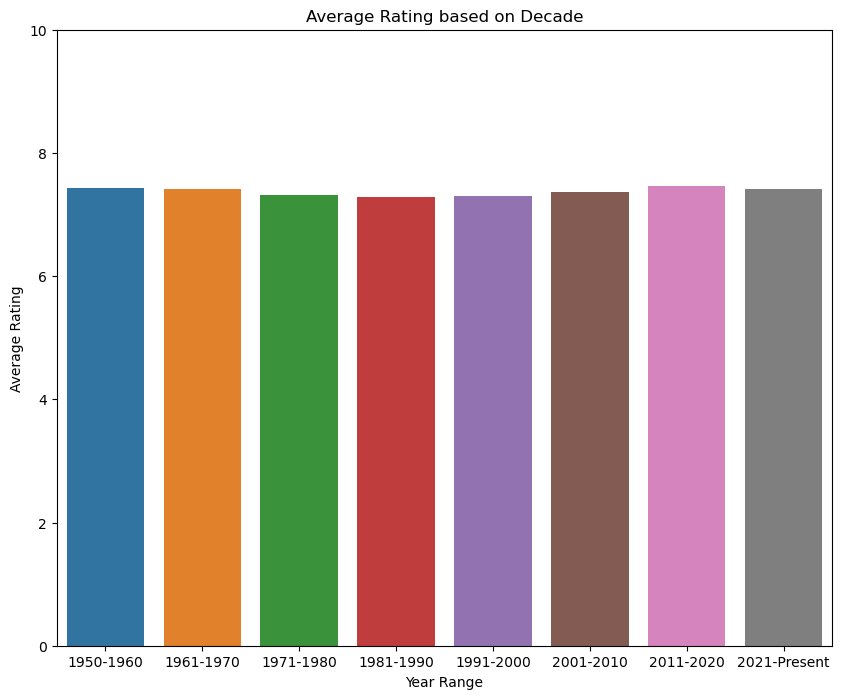

In [61]:
plt.figure(figsize=(10,8))
sns.barplot(data = averageplot, x='Year Range', y='Average Rating')
plt.title('Average Rating based on Decade')
plt.ylim(0,10)

(0.0, 10.0)

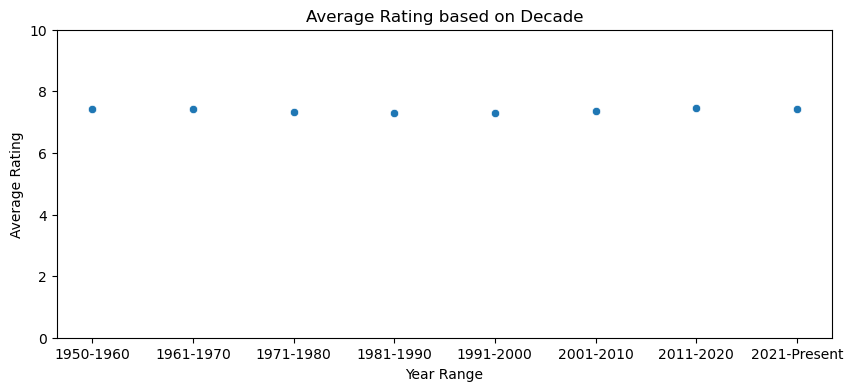

In [64]:
plt.figure(figsize=(10,4))
plt.title('Average Rating based on Decade')
sns.scatterplot(data = averageplot, x='Year Range', y='Average Rating')
plt.ylim(0,10)

In [33]:
genres =titleep.drop(['seasonNumber', 'episodeNumber', 'numVotes','originalTitle','startYear','runtimeMinutes'], axis = 1)

In [34]:
genres

,averageRating,genres
0,7.6,Western
1,7.6,Drama
2,4.5,Drama
3,6.9,"Drama,History,Music"
5,5.9,"Adventure,Drama,Family"
...,...,...
691261,9.2,"Adventure,Animation,Comedy"
691262,8.3,"Adventure,Animation,Comedy"
691264,7.1,"Family,Game-Show,Reality-TV"
691266,8.8,"Adventure,Animation,Comedy"


In [35]:
genres = genres.dropna()[genres.dropna()['genres'].str.contains(',') == 0]

In [37]:
genres.head(10)

,averageRating,genres
0,7.6,Western
1,7.6,Drama
2,4.5,Drama
7,3.5,Drama
8,8.5,Drama
9,6.9,Drama
10,6.0,Drama
11,8.0,Drama
12,6.0,Drama
13,7.6,Drama


In [38]:
genres.groupby('genres')['genres'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(28)

,genres,count
5,Comedy,36773
18,Reality-TV,17689
8,Drama,15916
7,Documentary,12602
26,Western,6484
6,Crime,3538
23,Talk-Show,1301
11,Game-Show,1131
2,Adventure,784
9,Family,598


In [47]:
genres.head()

,averageRating,genres
0,7.6,Western
1,7.6,Drama
2,4.5,Drama
7,3.5,Drama
8,8.5,Drama


In [48]:
genreaverages = genres.groupby('genres')['averageRating'].mean()

In [49]:
genreaverages.head(30)

genres
Action         7.474534
Adult          7.070000
Adventure      7.205357
Animation      7.069162
Biography      7.692079
Comedy         7.426587
Crime          7.147852
Documentary    7.487034
Drama          7.578977
Family         6.819398
Fantasy        8.073684
Game-Show      7.583908
History        7.578717
Horror         6.595227
Music          7.386638
Musical        8.135246
Mystery        7.166515
News           7.205405
Reality-TV     7.033597
Romance        7.592453
Sci-Fi         7.126551
Short          7.099145
Sport          6.980653
Talk-Show      7.197848
Thriller       7.279541
War            6.842857
Western        7.683020
Name: averageRating, dtype: float64

In [52]:
genreav = pd.DataFrame({'Genre': ['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 
                                   'Documentary', 'Drama', 'Family', 'Fantasy', 'Game-Show', 'History', 'Horror',
                                   'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 
                                   'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western'], 
                         'Average Rating': [7.521296, 7.788554, 7.263622, 7.260053, 7.365121, 7.405114, 7.169915, 7.588291, 
                                            7.679771, 6.933516, 8.038359, 7.413023, 7.763908, 6.830784, 7.365617, 8.142339, 
                                            7.369731, 6.908606, 7.078418, 8.094701, 7.121816, 6.979263, 7.257751, 
                                            7.019592, 7.252116, 7.622449, 7.671746]})

In [55]:
genreav.head()

,Genre,Average Rating
0,Action,7.521296
1,Adult,7.788554
2,Adventure,7.263622
3,Animation,7.260053
4,Biography,7.365121


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Adult'),
  Text(2, 0, 'Adventure'),
  Text(3, 0, 'Animation'),
  Text(4, 0, 'Biography'),
  Text(5, 0, 'Comedy'),
  Text(6, 0, 'Crime'),
  Text(7, 0, 'Documentary'),
  Text(8, 0, 'Drama'),
  Text(9, 0, 'Family'),
  Text(10, 0, 'Fantasy'),
  Text(11, 0, 'Game-Show'),
  Text(12, 0, 'History'),
  Text(13, 0, 'Horror'),
  Text(14, 0, 'Music'),
  Text(15, 0, 'Musical'),
  Text(16, 0, 'Mystery'),
  Text(17, 0, 'News'),
  Text(18, 0, 'Reality-TV'),
  Text(19, 0, 'Romance'),
  Text(20, 0, 'Sci-Fi'),
  Text(21, 0, 'Short'),
  Text(22, 0, 'Sport'),
  Text(23, 0, 'Talk-Show'),
  Text(24, 0, 'Thriller'),
  Text(25, 0, 'War'),
  Text(26, 0, 'Western')])

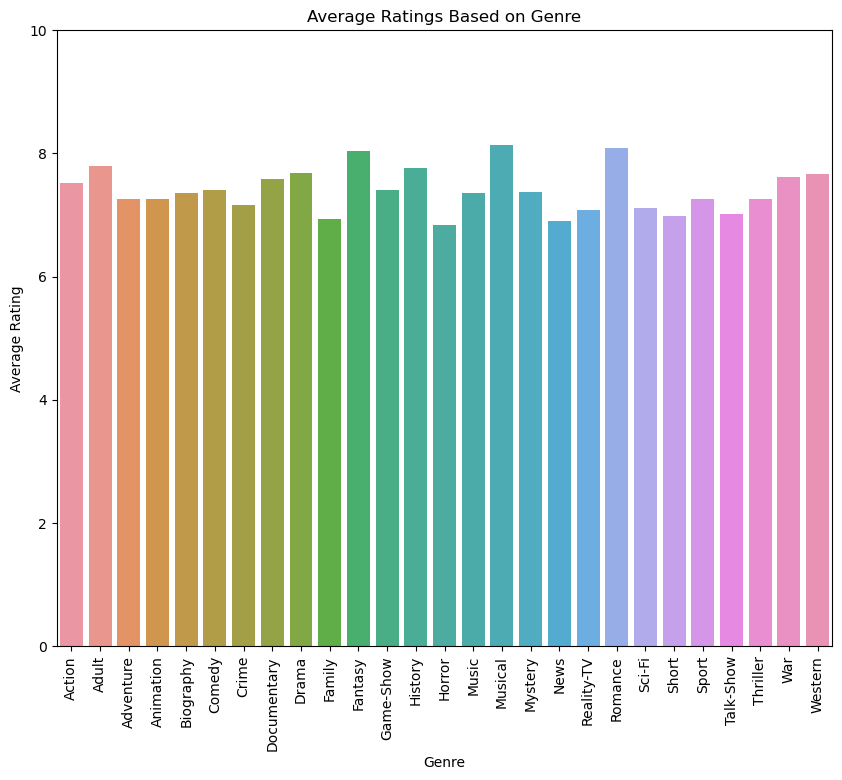

In [62]:
plt.figure(figsize=(10,8))
sns.barplot(data = genreav, x='Genre', y='Average Rating')
plt.title('Average Ratings Based on Genre')
plt.ylim(0,10)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Adult'),
  Text(2, 0, 'Adventure'),
  Text(3, 0, 'Animation'),
  Text(4, 0, 'Biography'),
  Text(5, 0, 'Comedy'),
  Text(6, 0, 'Crime'),
  Text(7, 0, 'Documentary'),
  Text(8, 0, 'Drama'),
  Text(9, 0, 'Family'),
  Text(10, 0, 'Fantasy'),
  Text(11, 0, 'Game-Show'),
  Text(12, 0, 'History'),
  Text(13, 0, 'Horror'),
  Text(14, 0, 'Music'),
  Text(15, 0, 'Musical'),
  Text(16, 0, 'Mystery'),
  Text(17, 0, 'News'),
  Text(18, 0, 'Reality-TV'),
  Text(19, 0, 'Romance'),
  Text(20, 0, 'Sci-Fi'),
  Text(21, 0, 'Short'),
  Text(22, 0, 'Sport'),
  Text(23, 0, 'Talk-Show'),
  Text(24, 0, 'Thriller'),
  Text(25, 0, 'War'),
  Text(26, 0, 'Western')])

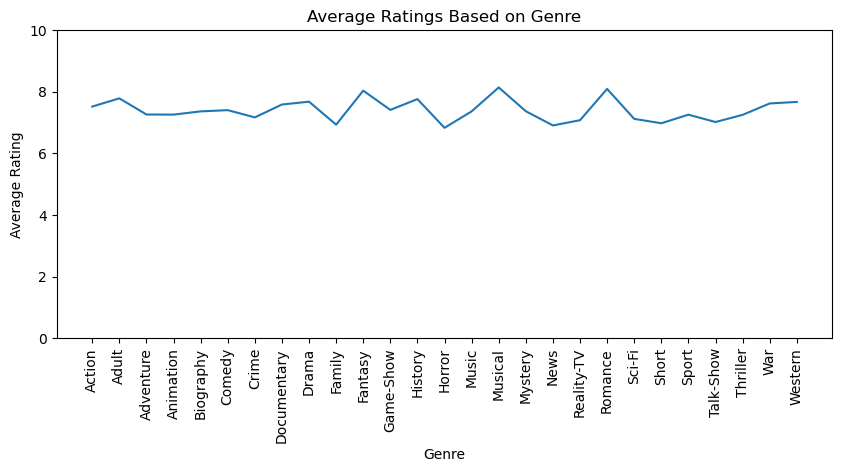

In [63]:
plt.figure(figsize=(10,4))
sns.lineplot(data = genreav, x='Genre', y='Average Rating')
plt.title('Average Ratings Based on Genre')
plt.ylim(0,10)
plt.xticks(rotation=90)